In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict, Counter
from evaluators import *
from evaluator import *
from helpers import REGISTERED_EVALUATORS

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from mpltools import style
#plt.style.use('seaborn-pastel')
from matplotlib.ticker import FuncFormatter

import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/helena.mihaljevic-br/.virtualenvs/name-based-inference/lib/python3.5/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)
/Users/helena.mihaljevic-br/.virtualenvs/name-based-inference/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['style', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
matplotlib.rcParams.update({'font.size': 14})

In [3]:
REGISTERED_EVALUATORS

[evaluators.GenderAPIEvaluator,
 evaluators.GenderAPIFullEvaluator,
 evaluators.NameAPIEvaluator,
 evaluators.NameAPIFullEvaluator,
 evaluators.NamSorEvaluator,
 evaluators.GenderGuesserEvaluator,
 evaluators.GenderizeIoEvaluator]

In [4]:
evs_plot = [NameAPIEvaluator, NamSorEvaluator, GenderAPIEvaluator, GenderizeIoEvaluator]

In [5]:
def load_ev(serv):
    ev = serv('all')
    ev.load_data(evaluated=True)
    ev.preprocess_tuning_params()
    ev._translate_api_response()
    ev.remove_rows_with_unknown_gender(gender=True, gender_infered=False)
    ev.remove_rows_with_unknown_gender(gender=False, gender_infered=True)
    
    return ev

In [6]:
ev1 = load_ev(evs_plot[0])
ev2 = load_ev(evs_plot[1])
ev3 = load_ev(evs_plot[2])
ev4 = load_ev(evs_plot[3])

In [7]:
[ev.tuning_params for ev in [ev1, ev2, ev3, ev4]]

[['api_confidence'],
 ['api_scale'],
 ['api_accuracy', 'api_samples'],
 ['api_probability', 'api_count']]

In [8]:
# Scatter plot for 2 pars
def plot_par1_vs_par2(df, ax, par1, par2, color='C0', s=0.5, title='', logy=False):

    ind = np.zeros(len(df), dtype='bool')
    
    df[~ind].plot.scatter(par1, par2, s=s, alpha=0.6, ax=ax, color=color, logy=logy)

    ax.set_xlabel(par1.replace('api_', ''))
    ax.set_ylabel(par2.replace('api_', ''))
    ax.set_title(title)
    ax.grid(ls=':', color='k')

    return ax

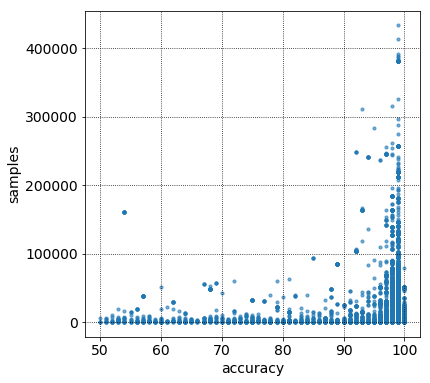

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plot_par1_vs_par2(ev3.test_data, ax, ev3.tuning_params[0], ev3.tuning_params[1], s=10)

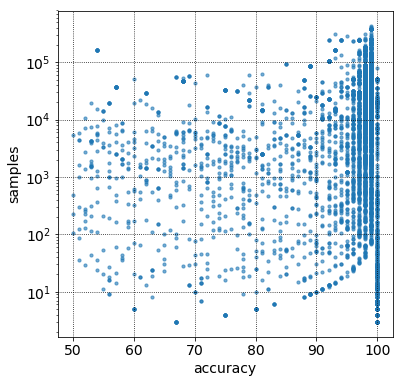

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plot_par1_vs_par2(ev3.test_data, ax, ev3.tuning_params[0], ev3.tuning_params[1], s=10, logy=True)

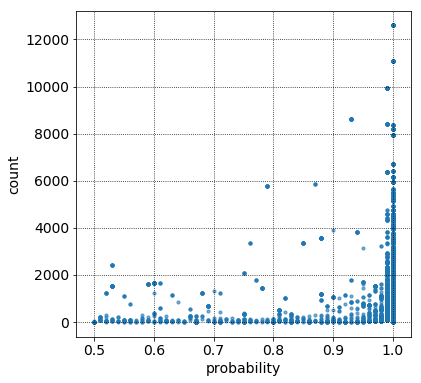

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plot_par1_vs_par2(ev4.test_data, ax, ev4.tuning_params[0], ev4.tuning_params[1], s=10)

In [12]:
# Hist plot for 1 par
def plot_count_vs_var(df, ax, var, bins=20, leg=True, **plot_kwargs):
    """"""

    orientation = plot_kwargs.get('orientation', None)
    
    varvals = df[var].values
    varrange = varvals.max() - varvals.min()
    ax.hist(varvals, bins=bins, label=var.replace('api_', ''), **plot_kwargs);
    if leg==True:
        if orientation=='horizontal':
            ax.annotate(var.replace('api_', ''), xy=(0.9, 0.92), xycoords='axes fraction', ha='right',
                size=14, bbox=dict(boxstyle='round', fc='w', color='gray'))
        else:
            ax.annotate(var.replace('api_', ''), xy=(0.05, 0.82), xycoords='axes fraction',
                size=14, bbox=dict(boxstyle='round', fc='w', color='gray'))
    ax.grid(ls=':', color='k')
    
    return ax

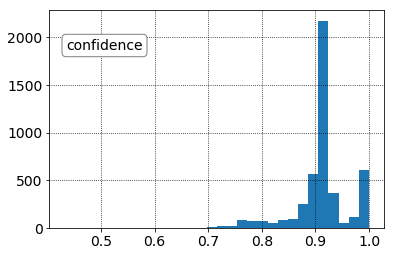

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_count_vs_var(ev1.test_data, ax, ev1.tuning_params[0], bins=30, leg=True)

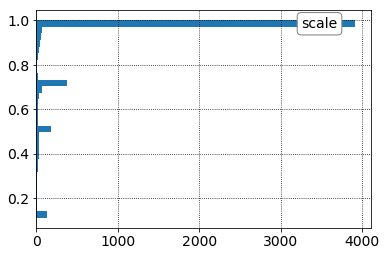

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_count_vs_var(ev2.test_data, ax, ev2.tuning_params[0], bins=30, orientation='horizontal')

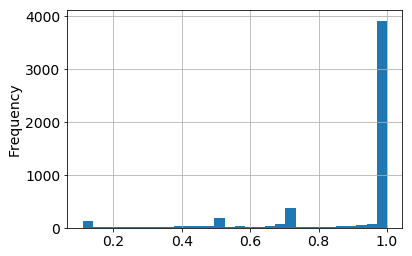

In [15]:
# Comparison with pandas hist plot
ev2.test_data[ev2.tuning_params[0]].plot(kind='hist', bins=30, grid=True)

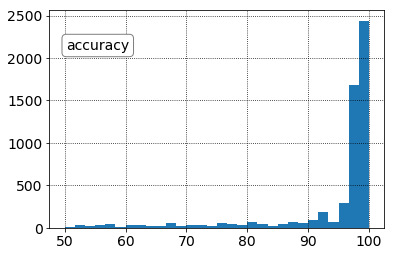

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_count_vs_var(ev3.test_data, ax, ev3.tuning_params[0], bins=30)

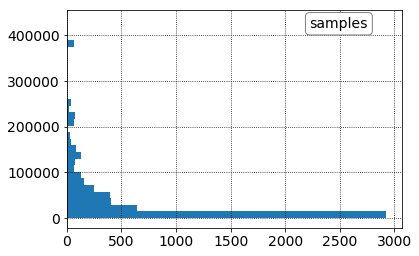

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_count_vs_var(ev3.test_data, ax, ev3.tuning_params[1], bins=30, orientation='horizontal')

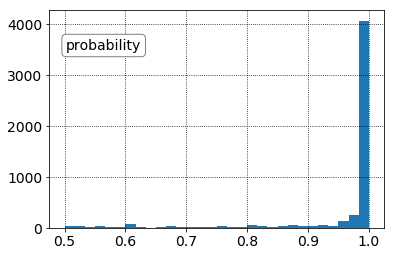

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_count_vs_var(ev4.test_data, ax, ev4.tuning_params[0], bins=30)

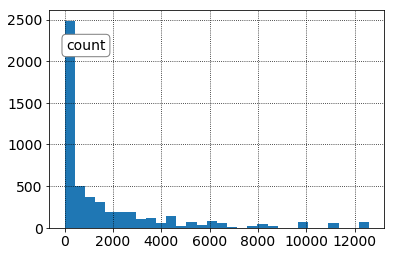

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_count_vs_var(ev4.test_data, ax, ev4.tuning_params[1], bins=30)

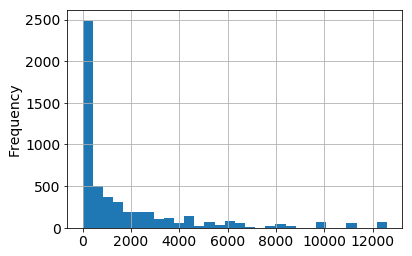

In [20]:
# Comparison with pandas hist plot
ev4.test_data[ev4.tuning_params[1]].plot(kind='hist', bins=30, grid=True)

In [21]:
class TriplePlot:
    """
    """

    def __init__(self):
        
        gs = gridspec.GridSpec(6, 6)

        self.ax1 = plt.subplot(gs[2:6, :4])

        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
        plt.setp(self.ax2.get_yticklabels(), visible=False);

        self.ax3 = plt.subplot(gs[:2, :4])
        plt.setp(self.ax3.get_xticklabels(), visible=False);

    def plot(self, df, par1, par2, color='darkblue', alpha=0.8, markersize=0.5, bins=20, leg=True):

        plot_par1_vs_par2(df, self.ax1, par1, par2, color=color, s=markersize)
        plot_count_vs_var(df, self.ax2, par2, bins=bins, color=color, alpha=alpha,
                          orientation='horizontal', leg=leg)
        plot_count_vs_var(df, self.ax3, par1, bins=bins, color=color, alpha=alpha, leg=leg)

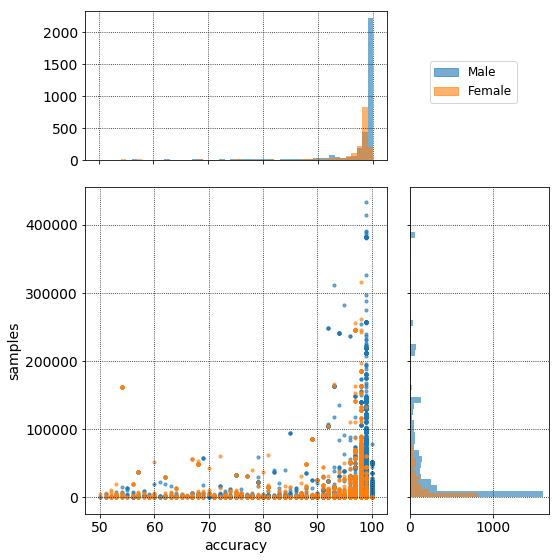

In [22]:
plt.figure(figsize=(8,8));
tpl = TriplePlot()

tpl.plot(ev3.test_data[ev3.test_data.gender=='m'], ev3.tuning_params[0], ev3.tuning_params[1], bins=50, 
         color='C0', alpha=0.6, markersize=10, leg=False)
tpl.plot(ev3.test_data[ev3.test_data.gender=='f'], ev3.tuning_params[0], ev3.tuning_params[1], bins=50, 
         color='C1', alpha=0.6, markersize=10, leg=False)
p1 = mpatches.Patch(color='C0', label='Male', alpha=0.6)
p2 = mpatches.Patch(color='C1', label='Female', alpha=0.6)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=12, shadow=False)
plt.tight_layout()

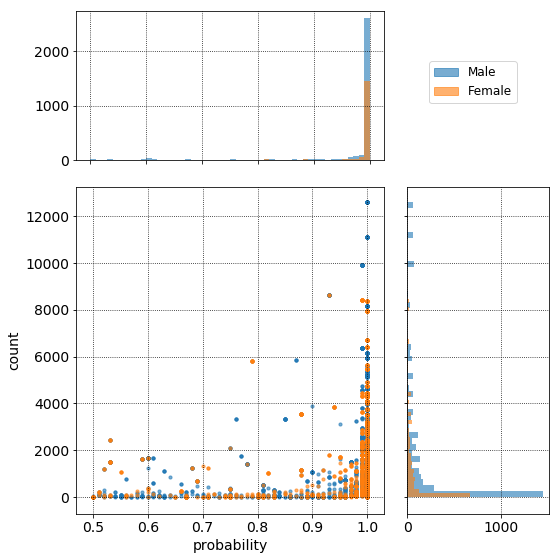

In [23]:
plt.figure(figsize=(8,8));
tpl = TriplePlot()

tpl.plot(ev4.test_data[ev4.test_data.gender=='m'], ev4.tuning_params[0], ev4.tuning_params[1], bins=50, 
         color='C0', alpha=0.6, markersize=10, leg=False)
tpl.plot(ev4.test_data[ev4.test_data.gender=='f'], ev4.tuning_params[0], ev4.tuning_params[1], bins=50, 
         color='C1', alpha=0.6, markersize=10, leg=False)
p1 = mpatches.Patch(color='C0', label='Male', alpha=0.6)
p2 = mpatches.Patch(color='C1', label='Female', alpha=0.6)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=12, shadow=False)
plt.tight_layout()

In [24]:
def sample_parameters_for_all_services(n_iter=20, method='square', random_state=None):
    service_to_param_range = {}
    for s in REGISTERED_EVALUATORS:  
        evaluator = s('all')
        evaluator.load_data(evaluated=True)
        evaluator.preprocess_tuning_params()
        evaluator._translate_api_response()
        evaluator.remove_rows_with_unknown_gender(gender=False, gender_infered=True)
        
        service_to_param_range[evaluator.gender_evaluator] = evaluator.sample_parameters(n_iter=n_iter, 
                                                                                         method=method, 
                                                                                         random_state=random_state)
        
    return service_to_param_range

In [25]:
grid_30_30 = sample_parameters_for_all_services(n_iter=30, method="constant")

In [26]:
# Scatter plot for 2 pars
def plot_grid_2d(grid, ax, par1, par2, color='C0', s=0.5, alpha=0.6, marker='o'):

    df = pd.DataFrame.from_dict(grid)
    df = df[df.sum(axis=1)!=0] # remove default tuple (0,0)
    
    ind = np.zeros(len(df), dtype='bool')
    
    df[~ind].plot.scatter(par1, par2, s=s, alpha=alpha, ax=ax, color=color, marker=marker)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(ls=':', color='k')

    return ax

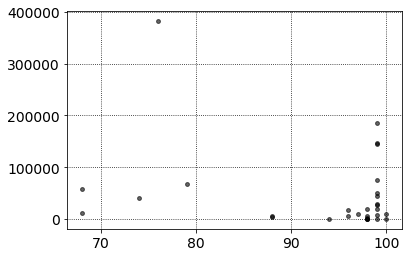

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_grid_2d(grid_30_30['gender_api'], ax, ev3.tuning_params[0], ev3.tuning_params[1], color='k', s=60, marker='.')

In [28]:
# Scatter plot for 2 pars
def plot_grid_1d(grid, ax, par1, height, color='C0', s=0.5, alpha=0.6, marker='o', orientation='vertical'):

    df = pd.DataFrame.from_dict(grid)
    df = df[df.sum(axis=1)!=0] # remove default tuple (0,0)
    df['height'] = height
    
    ind = np.zeros(len(df), dtype='bool')
    
    if orientation == 'horizontal':
        df[~ind].plot.scatter('height', par1, s=s, alpha=alpha, ax=ax, color=color, marker=marker, 
                          xlim=(0,height), clip_on=False)
    else:
        df[~ind].plot.scatter(par1, 'height', s=s, alpha=alpha, ax=ax, color=color, marker=marker, 
                          ylim=(0,height), clip_on=False)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(ls=':', color='k')

    return ax

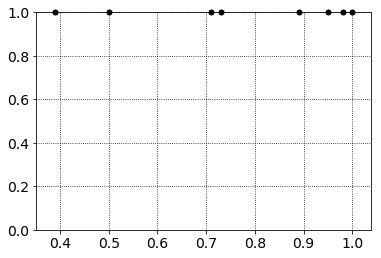

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_grid_1d(grid_30_30['namsor'], ax, ev2.tuning_params[0], 1, color='k', alpha=1,  s=100, marker='.')

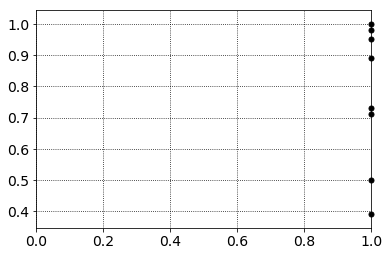

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_grid_1d(grid_30_30['namsor'], ax, ev2.tuning_params[0], 1, color='k', alpha=1,  s=100, 
             marker='.', orientation='horizontal')

In [31]:
class MegaPlot:
    """
    """

    def __init__(self):
        
        gs0 = gridspec.GridSpec(2, 2)
        
        gs00 = gridspec.GridSpecFromSubplotSpec(6, 6, subplot_spec=gs0[0,0])
        gs01 = gridspec.GridSpecFromSubplotSpec(6, 6, subplot_spec=gs0[0,1])
        
        # Histograms for 2 services with 1 param
        self.ax1 = plt.subplot(gs00[4:6, :4])
        self.ax2 = plt.subplot(gs01[4:6, :4])

        gs10 = gridspec.GridSpecFromSubplotSpec(6, 6, subplot_spec=gs0[1,0])
        gs11 = gridspec.GridSpecFromSubplotSpec(6, 6, subplot_spec=gs0[1,1])

        # Scatter plot left
        self.ax3 = plt.subplot(gs10[2:6, :4])
        # Histogram right of scatter plot
        self.ax4 = plt.subplot(gs10[2:6, 4:6], sharey=self.ax3)
        plt.setp(self.ax4.get_yticklabels(), visible=False);
        # Histogram above scatter plot
        self.ax5 = plt.subplot(gs10[:2, :4])
        plt.setp(self.ax5.get_xticklabels(), visible=False);
        
        # Scatter plot right
        self.ax6 = plt.subplot(gs11[2:6, :4])
        # Histogram right of scatter plot
        self.ax7 = plt.subplot(gs11[2:6, 4:6], sharey=self.ax6)
        plt.setp(self.ax7.get_yticklabels(), visible=False);
        # Histogram above scatter plot
        self.ax8 = plt.subplot(gs11[:2, :4])
        plt.setp(self.ax8.get_xticklabels(), visible=False);
        
        self.axes = [self.ax1, self.ax2, (self.ax3, self.ax4, self.ax5), (self.ax6, self.ax7, self.ax8)]
        
    def plot_hist(self, df, par, ax_nr, color='darkblue', bins=30, alpha=0.5, leg=True):
        
        plot_count_vs_var(df, self.axes[ax_nr-1], par, bins=bins, color=color, alpha=alpha, leg=leg)

        
    def plot_triple(self, df, par1, par2, ax_nr, color='darkblue', alpha=0.8, markersize=0.5, bins=20, 
                    leg=False, logy=True):

        plot_par1_vs_par2(df, self.axes[ax_nr-1][0], par1, par2, color=color, s=markersize, logy=logy)
        plot_count_vs_var(df, self.axes[ax_nr-1][1], par2, bins=bins, color=color, alpha=alpha,
                          orientation='horizontal', leg=leg)
        plot_count_vs_var(df, self.axes[ax_nr-1][2], par1, bins=bins, color=color, alpha=alpha, leg=leg)
        
    def plot_grid(self, grid, tune_pars, ax_nr, color='darkblue', alpha=0.8, markersize=0.5, marker='x', leg=False):
        
        if len(tune_pars)==2:
            plot_grid_2d(grid, self.axes[ax_nr-1][0], tune_pars[0], tune_pars[1], color=color, 
                         alpha=alpha, s=markersize, marker=marker)
        if len(tune_pars)==1:
            if isinstance(ax_nr, tuple):
                if ax_nr[1] == 2:
                    ymin, ymax = self.axes[ax_nr[0]-1][ax_nr[1]].get_ylim()
                    plot_grid_1d(grid, self.axes[ax_nr[0]-1][ax_nr[1]], tune_pars[0], ymax, 
                                 color=color, alpha=alpha, s=markersize, marker=marker)
                elif ax_nr[1] == 1:
                    xmin, xmax = self.axes[ax_nr[0]-1][ax_nr[1]].get_xlim()
                    plot_grid_1d(grid, self.axes[ax_nr[0]-1][ax_nr[1]], tune_pars[0], xmax, 
                                 color=color, alpha=alpha, s=markersize, marker=marker, orientation='horizontal')
            else:
                ymin, ymax = self.axes[ax_nr-1].get_ylim()
                plot_grid_1d(grid, self.axes[ax_nr-1], tune_pars[0], ymax, color=color, 
                             alpha=alpha, s=markersize, marker=marker)

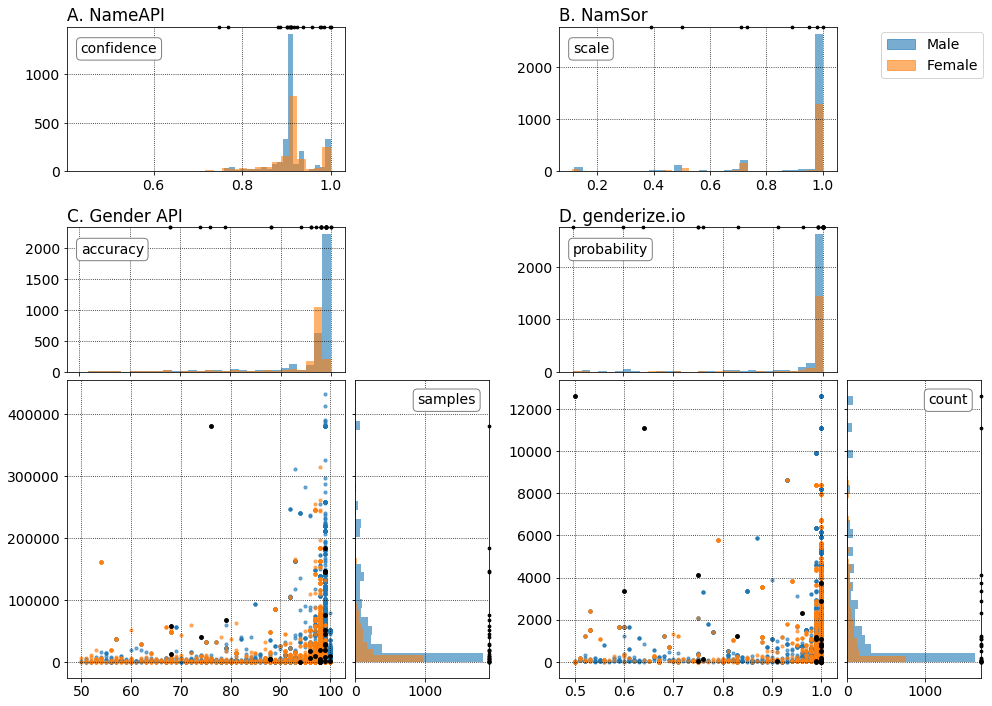

In [32]:
nbins = 30
alpha = 0.6
color_m = 'C0'
color_f = 'C1'
color_grid = 'k'
markersize_grid = 30
alpha_grid = 1

plt.figure(figsize=(14,14));
mpl = MegaPlot()

# Name API
mpl.plot_hist(ev1.test_data[ev1.test_data.gender=='m'], ev1.tuning_params[0], 1, bins=nbins, color=color_m, 
              alpha=alpha, leg=False)
mpl.plot_hist(ev1.test_data[ev1.test_data.gender=='f'], ev1.tuning_params[0], 1, bins=nbins, color=color_f, 
              alpha=alpha, leg=True)

mpl.plot_grid(grid_30_30['name_api'], ev1.tuning_params, 1, color=color_grid, markersize=markersize_grid, 
              alpha=alpha_grid, marker='.')

mpl.ax1.set_title('A. NameAPI', loc='left')

# Namsor
mpl.plot_hist(ev2.test_data[ev2.test_data.gender=='m'], ev2.tuning_params[0], 2, bins=nbins, color=color_m, 
              alpha=alpha, leg=False)
mpl.plot_hist(ev2.test_data[ev2.test_data.gender=='f'], ev2.tuning_params[0], 2, bins=nbins, 
              color=color_f, alpha=alpha, leg=True)

mpl.plot_grid(grid_30_30['namsor'], ev2.tuning_params, 2, color='k', markersize=markersize_grid, 
              alpha=alpha_grid, marker='.')

mpl.ax2.set_title('B. NamSor', loc='left')

# Gender API
mpl.plot_triple(ev3.test_data[ev3.test_data.gender=='m'], ev3.tuning_params[0], ev3.tuning_params[1], 3, bins=nbins, 
         color=color_m, alpha=alpha, markersize=10, logy=False)
mpl.plot_triple(ev3.test_data[ev3.test_data.gender=='f'], ev3.tuning_params[0], ev3.tuning_params[1], 3, bins=nbins, 
         color=color_f, alpha=alpha, markersize=10, leg=True, logy=False)

mpl.plot_grid(grid_30_30['gender_api'], ev3.tuning_params, 3, color=color_grid,
              markersize=markersize_grid*2, alpha=alpha_grid, marker='.')

mpl.plot_grid(grid_30_30['gender_api'], ev3.tuning_params[0:1], (3,2), color=color_grid, 
              markersize=markersize_grid, alpha=alpha_grid, marker='.')
mpl.plot_grid(grid_30_30['gender_api'], ev3.tuning_params[1:2], (3,1), color=color_grid, 
              markersize=markersize_grid, alpha=alpha_grid, marker='.')

mpl.ax5.set_title('C. Gender API', loc='left')

# Genderize
mpl.plot_triple(ev4.test_data[ev4.test_data.gender=='m'], ev4.tuning_params[0], ev4.tuning_params[1], 4, bins=nbins, 
         color=color_m, alpha=alpha, markersize=10, logy=False)

mpl.plot_triple(ev4.test_data[ev4.test_data.gender=='f'], ev4.tuning_params[0], ev4.tuning_params[1], 4, bins=nbins, 
         color=color_f, alpha=alpha, markersize=10, leg=True, logy=False)

mpl.plot_grid(grid_30_30['genderize_io'], ev4.tuning_params, 4, color=color_grid, 
              markersize=markersize_grid*2, alpha=alpha_grid, marker='.')

mpl.plot_grid(grid_30_30['genderize_io'], ev4.tuning_params[0:1], (4,2), color=color_grid, 
              markersize=markersize_grid, alpha=alpha_grid, marker='.')
mpl.plot_grid(grid_30_30['genderize_io'], ev4.tuning_params[1:2], (4,1), color=color_grid, 
              markersize=markersize_grid, alpha=alpha_grid, marker='.')

mpl.ax8.set_title('D. genderize.io', loc='left')

p1 = mpatches.Patch(color=color_m, label='Male', alpha=alpha)
p2 = mpatches.Patch(color=color_f, label='Female', alpha=alpha)

# Legend Male/Female
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.55, 2.4], fontsize=14, shadow=False)

plt.tight_layout()
#plt.savefig('paper/submission/parameter_distribution.pdf', bbox_inches='tight')

In [33]:
matplotlib.rcParams.update({'font.size': 14})

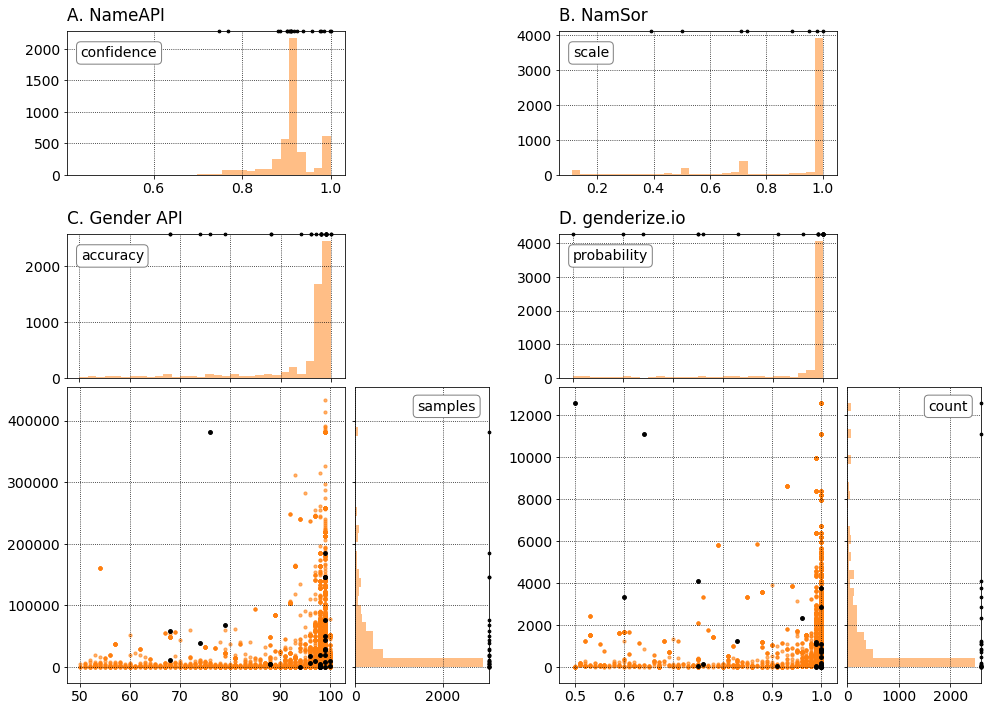

In [34]:
nbins = 30
alpha = 0.5
color = 'C1'
color_grid = 'k'
markersize_grid = 30
alpha_grid = 1
raise_title = 1.03

plt.figure(figsize=(14,14));
mpl = MegaPlot()

# Name API
mpl.plot_hist(ev1.test_data, ev1.tuning_params[0], 1, bins=nbins, color=color, 
              alpha=alpha, leg=True)

mpl.plot_grid(grid_30_30['name_api'], ev1.tuning_params, 1, color=color_grid, markersize=markersize_grid, 
              alpha=alpha_grid, marker='.')

mpl.ax1.set_title('A. NameAPI', loc='left', y=raise_title)

# Namsor
mpl.plot_hist(ev2.test_data, ev2.tuning_params[0], 2, bins=nbins, color=color, 
              alpha=alpha, leg=True)

mpl.plot_grid(grid_30_30['namsor'], ev2.tuning_params, 2, color=color_grid, markersize=markersize_grid, 
              alpha=alpha_grid, marker='.')

mpl.ax2.set_title('B. NamSor', loc='left', y=raise_title)

# Gender API
mpl.plot_triple(ev3.test_data, ev3.tuning_params[0], ev3.tuning_params[1], 3, bins=nbins, 
         color=color, alpha=alpha, markersize=10, leg=True, logy=False)

mpl.plot_grid(grid_30_30['gender_api'], ev3.tuning_params, 3, color=color_grid,
              markersize=markersize_grid*2, alpha=alpha_grid, marker='.')

mpl.plot_grid(grid_30_30['gender_api'], ev3.tuning_params[0:1], (3,2), color=color_grid, 
              markersize=markersize_grid, alpha=alpha_grid, marker='.')
mpl.plot_grid(grid_30_30['gender_api'], ev3.tuning_params[1:2], (3,1), color=color_grid, 
              markersize=markersize_grid, alpha=alpha_grid, marker='.')

mpl.ax5.set_title('C. Gender API', loc='left', y=raise_title)

# Genderize
mpl.plot_triple(ev4.test_data, ev4.tuning_params[0], ev4.tuning_params[1], 4, bins=nbins, 
         color=color, alpha=alpha, markersize=10, leg=True, logy=False)

mpl.plot_grid(grid_30_30['genderize_io'], ev4.tuning_params, 4, color=color_grid, 
              markersize=markersize_grid*2, alpha=alpha_grid, marker='.')

mpl.plot_grid(grid_30_30['genderize_io'], ev4.tuning_params[0:1], (4,2), color=color_grid, 
              markersize=markersize_grid, alpha=alpha_grid, marker='.')
mpl.plot_grid(grid_30_30['genderize_io'], ev4.tuning_params[1:2], (4,1), color=color_grid, 
              markersize=markersize_grid, alpha=alpha_grid, marker='.')

mpl.ax8.set_title('D. genderize.io', loc='left', y=raise_title)

plt.tight_layout()
plt.savefig('paper/submission/parameter_distribution.pdf', bbox_inches='tight')